# Formula 1 Grand Prix Exploratory Data Analysis (EDA)

## Exploratory based on the drivers, constructors or both 
### FIA Rules defined in the last 10 years

Before begining the project we need to understand the history of F1 and the different eras in which a certain driver or tream dominated the whole grid. Here are some important eras of F1 in (relatively) recent history.  

* 1994-2009 Schumacher (Scuderia Ferrari)
* 2007-2010 Alonso (Renault,Scuderia Ferrari)
* 2011-2013 Vettle (Redbull Racing)
* 2014-Present Hamilton (Mercedes-Benz)

An F1 team's performance is largely dependent on the FIA technical regulation for the season. After the 2013 season, new engine regulations were made (Hybrid era). Mercedes-Benz is the most dominant team since, followed by Red Bull Racing and Scuderia Ferrari. Rules are set to change for 2022, so whatever analysis is made here will not apply for 2022 season and after. Only data after 2010 will be considered in the following analysis.

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import time
start = time.time()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
plt.style.use('seaborn')

In [20]:
results = pd.read_csv(r'./data_f1/results.csv')
races = pd.read_csv(r'./data_f1/races.csv')
quali = pd.read_csv(r'./data_f1/qualifying.csv')
drivers = pd.read_csv(r'./data_f1/drivers.csv')
constructors = pd.read_csv(r'./data_f1/constructors.csv')
circuit = pd.read_csv(r'./data_f1/circuits.csv')

In [21]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'])

In [22]:
df5.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,resultId,driverId,...,nationality_y,url_x,circuitRef,name,location,country,lat,lng,alt,url_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7554,18,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7555,22,...,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,18,18,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,383,18,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,796,18,...,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [23]:
list(df5.columns)

['raceId',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_x',
 'url_x',
 'resultId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position_x',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_y',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'qualifyId',
 'number_y',
 'position_y',
 'q1',
 'q2',
 'q3',
 'driverRef',
 'number',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_y',
 'constructorRef',
 'name_y',
 'nationality_y',
 'url_x',
 'circuitRef',
 'name',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url_y']

In [24]:
data2021 = df5[df5['year']==2021]

In [25]:
print(data2021)

      raceId  year  round  circuitId                 name_x        date  \
1224    1052  2021      1          3     Bahrain Grand Prix  2021-03-28   
1227    1052  2021      1          3     Bahrain Grand Prix  2021-03-28   
1252    1052  2021      1          3     Bahrain Grand Prix  2021-03-28   
1263    1052  2021      1          3     Bahrain Grand Prix  2021-03-28   
1295    1052  2021      1          3     Bahrain Grand Prix  2021-03-28   
...      ...   ...    ...        ...                    ...         ...   
8624    1054  2021      3         75  Portuguese Grand Prix  2021-05-02   
8627    1054  2021      3         75  Portuguese Grand Prix  2021-05-02   
8628    1054  2021      3         75  Portuguese Grand Prix  2021-05-02   
8633    1054  2021      3         75  Portuguese Grand Prix  2021-05-02   
8634    1054  2021      3         75  Portuguese Grand Prix  2021-05-02   

        time_x                                              url_x  resultId  \
1224  15:00:00  http

In [26]:
list(results.columns)

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId']

In [27]:
#for col in results:
#    print(results[col].unique())
print(df5['year'].unique())

[2009 2008 2007 2006 2005 2004 2003 2000 1999 2011 2010 2017 2018 2019
 2016 1998 1997 1996 2014 2015 2012 2013 2002 2020 2021 1995 1994 2001]


In [48]:
oo = df5['year'].unique()

In [52]:
# Printing type of arr object
print("Array is of type: ", type(oo))

# Printing array dimensions (axes)
print("No. of dimensions: ", oo.ndim)
 
# Printing shape of array
print("Shape of array: ", oo.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", oo.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", oo.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  1
Shape of array:  (28,)
Size of array:  28
Array stores elements of type:  int64


In [56]:
ol = df5['year'].unique().tolist()
print(type(ol))

<class 'list'>


In [59]:
for i in ol:
        print (i)

2009
2008
2007
2006
2005
2004
2003
2000
1999
2011
2010
2017
2018
2019
2016
1998
1997
1996
2014
2015
2012
2013
2002
2020
2021
1995
1994
2001


In [60]:
data2021.to_csv('./data_f1/data_filtered_2021.csv', index = False)

In [61]:
#reasons for DNF(did not finish)
data2021['driver_dnf'] = data2021['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data2021['constructor_dnf'] = data2021['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)

In [64]:
list(data2021.columns)

['raceId',
 'year',
 'round',
 'circuitId',
 'name_x',
 'date',
 'time_x',
 'url_x',
 'resultId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position_x',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_y',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'qualifyId',
 'number_y',
 'position_y',
 'q1',
 'q2',
 'q3',
 'driverRef',
 'number',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_y',
 'constructorRef',
 'name_y',
 'nationality_y',
 'url_x',
 'circuitRef',
 'name',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url_y',
 'driver_dnf',
 'constructor_dnf']

In [65]:
font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':10
}

In [72]:
#rename the columns
data2021.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data2021['driver'] = data2021['forename']+' '+data2021['surname']
data2021['date'] = pd.to_datetime(data2021['date'])
data2021['dob'] = pd.to_datetime(data2021['dob'])

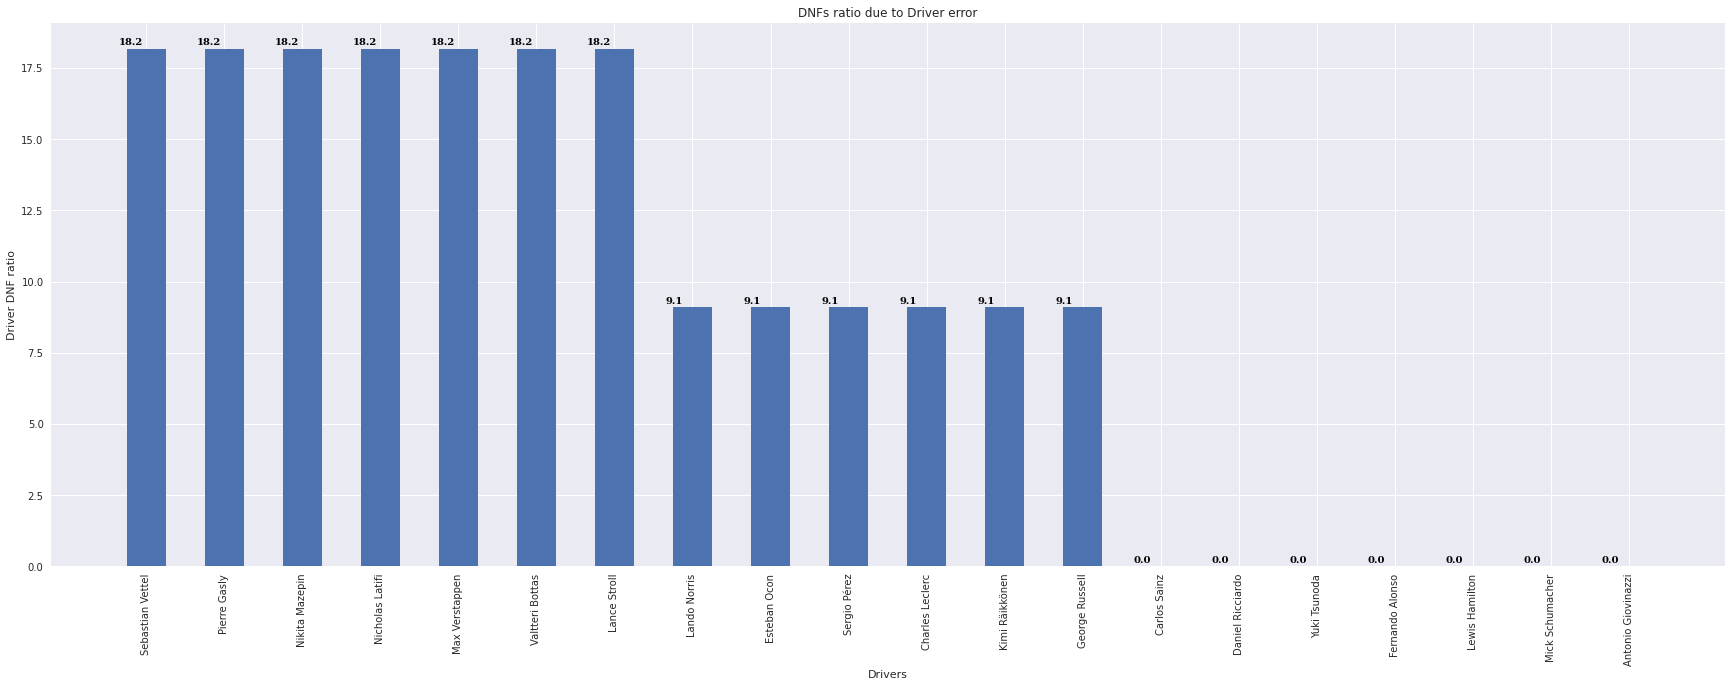

In [68]:
dnf_by_driver = data2021.groupby('driver').sum()['driver_dnf']
driver_race_entered = data2021.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to Driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}',fontdict=font)
plt.show()

In [130]:
#Some of the constructors changed their name over the year so replacing old names with current name
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Alpine F1' if x=='Lotus F1' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Alpine F1' if x=='Renault' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'Alpine F1' if x=='Alpine F1 Team' else x)
data2021['constructor'] = data2021['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

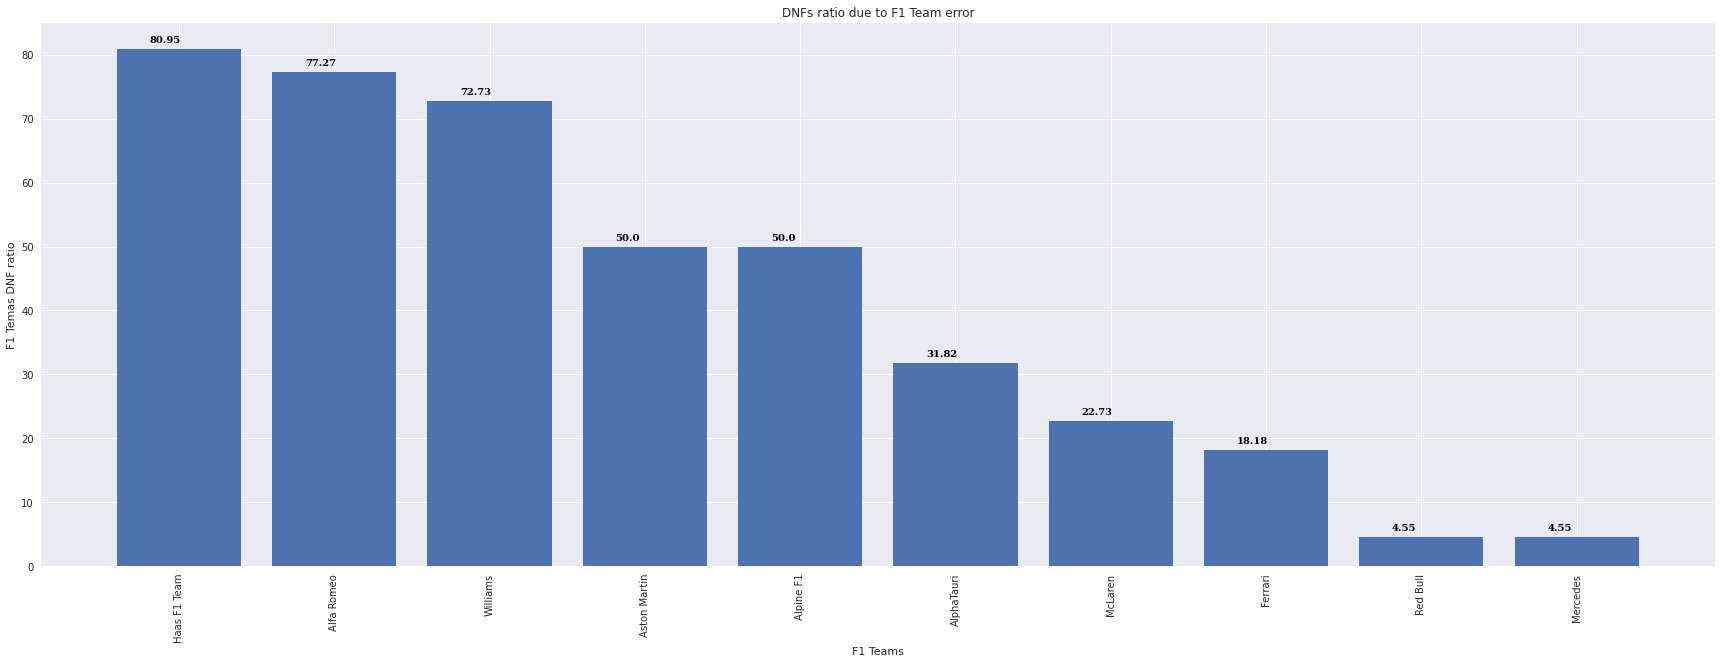

In [131]:
dnf_by_constructor = data2021.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data2021.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('F1 Teams')
plt.ylabel('F1 Temas DNF ratio')
plt.title('DNFs ratio due to F1 Team error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.21,yval+1,f'{round(yval,2)}',fontdict=font)
plt.show()

## Check Points

In [132]:
data2021['driver_nationality'] = data2021['driver_nationality'].apply(lambda x: str(x)[:3])
data2021['constructor_nationality'] = data2021['constructor_nationality'].apply(lambda x: str(x)[:3])
data2021['country'] = data2021['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data2021['country'] = data2021['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data2021['country'] = data2021['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data2021['country'] = data2021['country'].apply(lambda x: str(x)[:3])
data2021['driver_home'] = data2021['driver_nationality'] == data2021['country']
data2021['constructor_home'] = data2021['constructor_nationality'] == data2021['country']
data2021['driver_home'] = data2021['driver_home'].apply(lambda x: int(x))
data2021['constructor_home'] = data2021['constructor_home'].apply(lambda x: int(x))

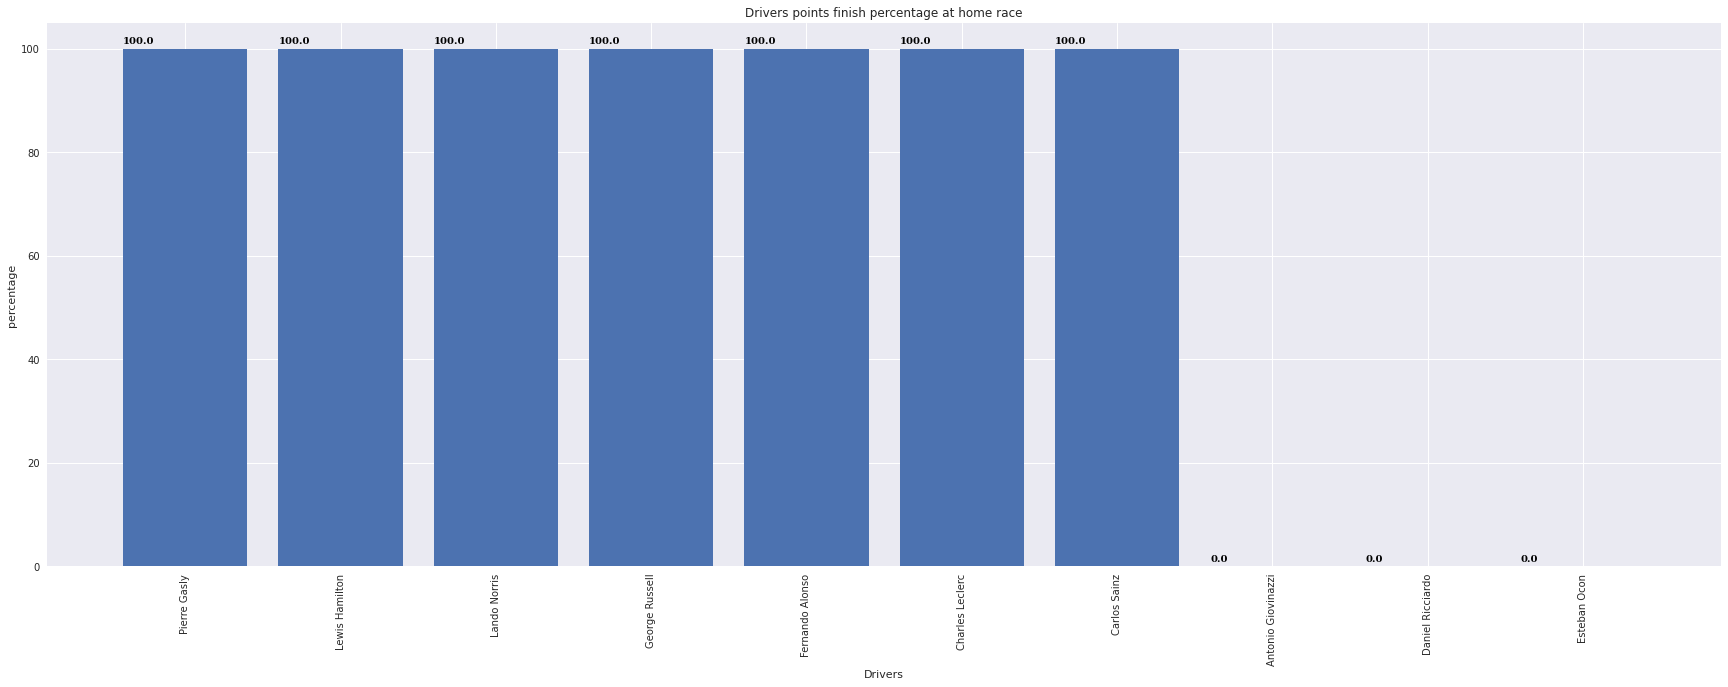

In [133]:
driver_home_points_finish = data2021.loc[(data2021['position']<11)&(data2021['driver_home']==1)].groupby('driver').count()['position']
total_home_races = data2021[data2021['driver_home']==1].groupby('driver').sum()['driver_home']
driver_home_point_finish_ratio = (driver_home_points_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_home_point_finish_ratio.index,height=driver_home_point_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('percentage')
plt.title('Drivers points finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+1,f'{round(yval,2)}',fontdict=font)
plt.show()

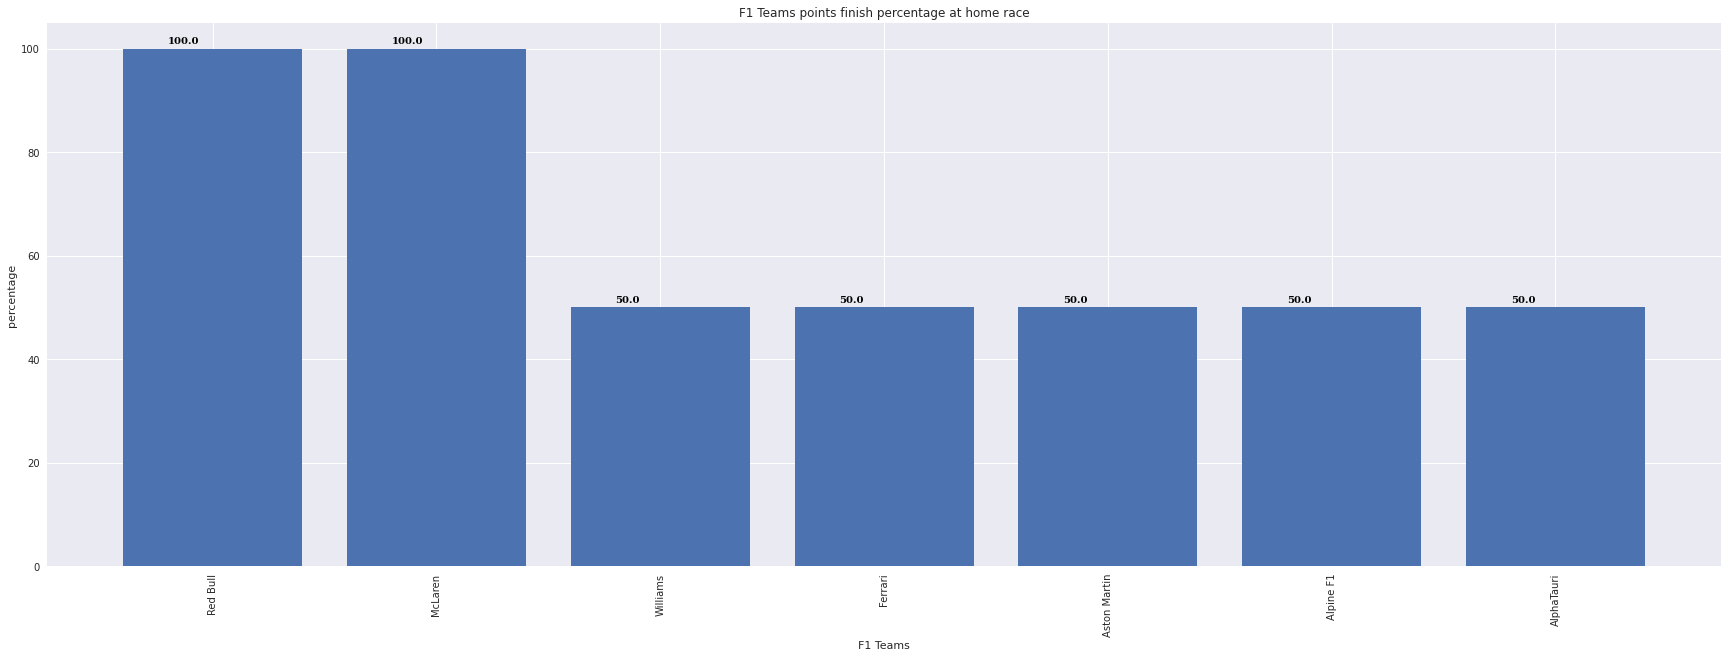

In [134]:
constructor_home_points_finish = data2021.loc[(data2021['position']<11)&(data2021['constructor_home']==1)].groupby('constructor').count()['position']
total_home_races = data2021[data2021['constructor_home']==1].groupby('constructor').sum()['constructor_home']
constructor_home_point_finish_ratio = (constructor_home_points_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_home_point_finish_ratio.index,height=constructor_home_point_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('F1 Teams')
plt.ylabel('percentage')
plt.title('F1 Teams points finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2,yval+1,f'{round(yval,2)}',fontdict=font)
plt.show()

In [135]:
data2021=data2021.sort_values(by='date')
races = data2021['GP_name'].unique().tolist()
print(races)

['Bahrain International Circuit', 'Autodromo Enzo e Dino Ferrari', 'Autódromo Internacional do Algarve', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Baku City Circuit', 'Circuit Paul Ricard', 'Red Bull Ring', 'Silverstone Circuit', 'Hungaroring']


In [136]:
drivers = data2021['driver'].unique().tolist()
print(drivers)

['George Russell', 'Valtteri Bottas', 'Nicholas Latifi', 'Daniel Ricciardo', 'Lando Norris', 'Carlos Sainz', 'Fernando Alonso', 'Esteban Ocon', 'Lewis Hamilton', 'Yuki Tsunoda', 'Charles Leclerc', 'Max Verstappen', 'Sebastian Vettel', 'Lance Stroll', 'Kimi Räikkönen', 'Antonio Giovinazzi', 'Mick Schumacher', 'Nikita Mazepin', 'Pierre Gasly', 'Sergio Pérez']


In [137]:
constructors = data2021['constructor'].unique().tolist()
print(constructors)

['Williams', 'Mercedes', 'McLaren', 'Ferrari', 'Alpine F1', 'AlphaTauri', 'Red Bull', 'Aston Martin', 'Alfa Romeo', 'Haas F1 Team']


In [138]:
results = {'race': [],
          'driver':[],
          'constructor':[],
          'points':[]}
for race in races:
    for driver in drivers:
        clst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['constructor'].unique().tolist()
        plst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['points'].unique().tolist()
        for c in clst:
            for p in plst:
                results['race'].append(race)
                results['driver'].append(driver)
                results['constructor'].append(c)
                results['points'].append(p)


In [139]:
oc = data2021.loc[(data2021['GP_name']=='Bahrain International Circuit')&(data2021['driver']=='Pierre Gasly')]['constructor']
print (oc)
print(type(oc))

1528    AlphaTauri
Name: constructor, dtype: object
<class 'pandas.core.series.Series'>


In [140]:
print (results)

{'race': ['Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Bahrain International Circuit', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 'Autodromo Enzo e Dino Ferrari', 

In [141]:
df2021= pd.DataFrame(results)
print (df2021)

                              race              driver   constructor  points
0    Bahrain International Circuit      George Russell      Williams     0.0
1    Bahrain International Circuit     Valtteri Bottas      Mercedes    16.0
2    Bahrain International Circuit     Nicholas Latifi      Williams     0.0
3    Bahrain International Circuit    Daniel Ricciardo       McLaren     6.0
4    Bahrain International Circuit        Lando Norris       McLaren    12.0
..                             ...                 ...           ...     ...
206                    Hungaroring  Antonio Giovinazzi    Alfa Romeo     0.0
207                    Hungaroring     Mick Schumacher  Haas F1 Team     0.0
208                    Hungaroring      Nikita Mazepin  Haas F1 Team     0.0
209                    Hungaroring        Pierre Gasly    AlphaTauri    11.0
210                    Hungaroring        Sergio Pérez      Red Bull     0.0

[211 rows x 4 columns]


In [143]:
#print('Number of Races: %s' & (df2021.groupby('race').count()));
#print('Number of Races: %s' & (str(len(races))));
print(f'Number of Races: {len(races)}')
#print (len(races))

Number of Races: 10


In [144]:
pts_by_driver = df2021.groupby('driver').sum()['points']
driver_race = df2021.groupby('driver').count()['race']
driver_points_ratio = (pts_by_driver/len(races)/25.0)
driver_points_dict = dict(zip(driver_points_ratio.index,driver_points_ratio))

In [145]:
driver_points_dict

{'Antonio Giovinazzi': 0.004,
 'Carlos Sainz': 0.332,
 'Charles Leclerc': 0.32,
 'Daniel Ricciardo': 0.2,
 'Esteban Ocon': 0.156,
 'Fernando Alonso': 0.152,
 'George Russell': 0.016,
 'Kimi Räikkönen': 0.008,
 'Lance Stroll': 0.07200000000000001,
 'Lando Norris': 0.452,
 'Lewis Hamilton': 0.78,
 'Max Verstappen': 0.748,
 'Mick Schumacher': 0.0,
 'Nicholas Latifi': 0.024,
 'Nikita Mazepin': 0.0,
 'Pierre Gasly': 0.2,
 'Sebastian Vettel': 0.12,
 'Sergio Pérez': 0.41600000000000004,
 'Valtteri Bottas': 0.43200000000000005,
 'Yuki Tsunoda': 0.07200000000000001}

In [146]:
pts_by_constructor = df2021.groupby('constructor').sum()['points']
constructor_race = df2021.groupby('constructor').count()['race']
constructor_pts_ratio = (pts_by_constructor/len(races)/(25.0+18.0))
constructor_points_dict = dict(zip(constructor_pts_ratio.index,constructor_pts_ratio))
#constructor_points_dict = dict(zip(pts_by_constructor.index,pts_by_constructor))

In [147]:
constructor_points_dict

{'Alfa Romeo': 0.0069767441860465115,
 'AlphaTauri': 0.15813953488372093,
 'Alpine F1': 0.17906976744186046,
 'Aston Martin': 0.11162790697674418,
 'Ferrari': 0.3790697674418605,
 'Haas F1 Team': 0.0,
 'McLaren': 0.3790697674418605,
 'Mercedes': 0.7046511627906977,
 'Red Bull': 0.6767441860465117,
 'Williams': 0.023255813953488372}

In [148]:
import pickle
def save_obj(obj, name ):
    with open('web/'+ name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [149]:
driver_pred_dict_str = {}
for key , value in driver_points_dict.items():
    driver_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [150]:
save_obj(driver_pred_dict_str, 'driver_pred_dict' )

In [151]:
constructor_pred_dict_str = {}
for key , value in constructor_points_dict.items():
    constructor_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [152]:
save_obj(constructor_pred_dict_str, 'constructor_pred_dict' )

In [153]:
print (data2021.columns)

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'url_x', 'resultId', 'driverId', 'constructorId', 'number_x',
       'quali_pos', 'position_x', 'positionText', 'positionOrder', 'points',
       'laps', 'time_y', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'qualifyId',
       'number_y', 'position', 'q1', 'q2', 'q3', 'driverRef', 'number', 'code',
       'forename', 'surname', 'dob', 'driver_nationality', 'url_y',
       'constructorRef', 'constructor', 'constructor_nationality', 'url_x',
       'circuitRef', 'GP_name', 'location', 'country', 'lat', 'lng', 'alt',
       'url_y', 'driver_dnf', 'constructor_dnf', 'driver', 'driver_home',
       'constructor_home'],
      dtype='object')


In [154]:
qualif = {'race': [],
          'driver':[],
          'quali_pos':[]
         }
for race in races:
    for driver in drivers:
        qlst = data2021.loc[(data2021['GP_name']==race)&(data2021['driver']==driver)]['quali_pos'].unique().tolist()
        for q in qlst:
            qualif['race'].append(race)
            qualif['driver'].append(driver)
            qualif['quali_pos'].append(q)


In [156]:
qualif2021= pd.DataFrame(qualif)
print (qualif2021)

                              race              driver  quali_pos
0    Bahrain International Circuit      George Russell         15
1    Bahrain International Circuit     Valtteri Bottas          3
2    Bahrain International Circuit     Nicholas Latifi         17
3    Bahrain International Circuit    Daniel Ricciardo          6
4    Bahrain International Circuit        Lando Norris          7
..                             ...                 ...        ...
205                    Hungaroring  Antonio Giovinazzi          0
206                    Hungaroring     Mick Schumacher         20
207                    Hungaroring      Nikita Mazepin         19
208                    Hungaroring        Pierre Gasly          5
209                    Hungaroring        Sergio Pérez          4

[210 rows x 3 columns]


In [157]:
qualif2021.to_csv('./data_f1/qualif_filtered.csv', index = False)

In [158]:
# last race
last_race = races[len(races)-1]
print(last_race)

Hungaroring


In [159]:
qualif_last= qualif2021[qualif2021['race']==last_race]
print (qualif_last)

            race              driver  quali_pos
190  Hungaroring      George Russell         17
191  Hungaroring     Valtteri Bottas          2
192  Hungaroring     Nicholas Latifi         18
193  Hungaroring    Daniel Ricciardo         11
194  Hungaroring        Lando Norris          6
195  Hungaroring        Carlos Sainz         15
196  Hungaroring     Fernando Alonso          9
197  Hungaroring        Esteban Ocon          8
198  Hungaroring      Lewis Hamilton          1
199  Hungaroring        Yuki Tsunoda         16
200  Hungaroring     Charles Leclerc          7
201  Hungaroring      Max Verstappen          3
202  Hungaroring    Sebastian Vettel         10
203  Hungaroring        Lance Stroll         12
204  Hungaroring      Kimi Räikkönen         13
205  Hungaroring  Antonio Giovinazzi          0
206  Hungaroring     Mick Schumacher         20
207  Hungaroring      Nikita Mazepin         19
208  Hungaroring        Pierre Gasly          5
209  Hungaroring        Sergio Pérez    

In [160]:
qualif_last.to_csv('./data_f1/qualif_lastrace.csv', index = False)

In [45]:
end = time.time()

In [46]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:08.976518'

In [47]:
print(str(end - start)+" seconds")

8.976518392562866 seconds
